### Plot Comulative Distribution Of Sportive Behavior Over Time

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from sensible_raw.loaders import loader
from world_viewer.cns_world import CNSWorld
from world_viewer.synthetic_world import SyntheticWorld
from world_viewer.glasses import Glasses
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import math

import pandas as pd
import numpy as np
#import dask.dataframe as dd
import time
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# load data and restict timeseries
# data from "PreprocessOpinions/FitnessAsBehavior.ipynb"
data = pd.read_pickle("data/op_fitness.pkl")
#data.reset_index(inplace=True)
opinion = "op_fitness"
data = data[data.time >= CNSWorld.CNS_TIME_BEGIN]
data = data[data.time <= CNSWorld.CNS_TIME_END]
data.head()

,node_id,time,op_fitness,op_fitness_abs
1,0,2013-09-02,0.0,0.0
2,0,2013-09-03,0.0,0.0
3,0,2013-09-04,0.0,0.0
4,0,2013-09-05,0.0,0.0
5,0,2013-09-06,0.0,0.0


In [32]:
# calc cummulative distribution function
def cdf_from_data(data, cdfx):
    size_data = len(data)
    y_values = []
    for i in cdfx:
        # all the values in data less than the ith value in x_values
        temp = data[data <= i]
        # fraction of that value with respect to the size of the x_values
        value = temp.size / size_data
        # pushing the value in the y_values
        y_values.append(value)
    # return both x and y values    
    return pd.DataFrame({'x':cdfx, 'cdf':y_values}).set_index("x")

cdfx = np.linspace(start=0,stop=4,num=400)

cdf = data.groupby("time")[opinion + "_abs"].apply(lambda d: cdf_from_data(d, cdfx))#

In [2]:
# load cdf if previously calculated
#cdf = pd.read_pickle("tmp/cdf_fitness.pkl")

<IPython.core.display.Javascript object>


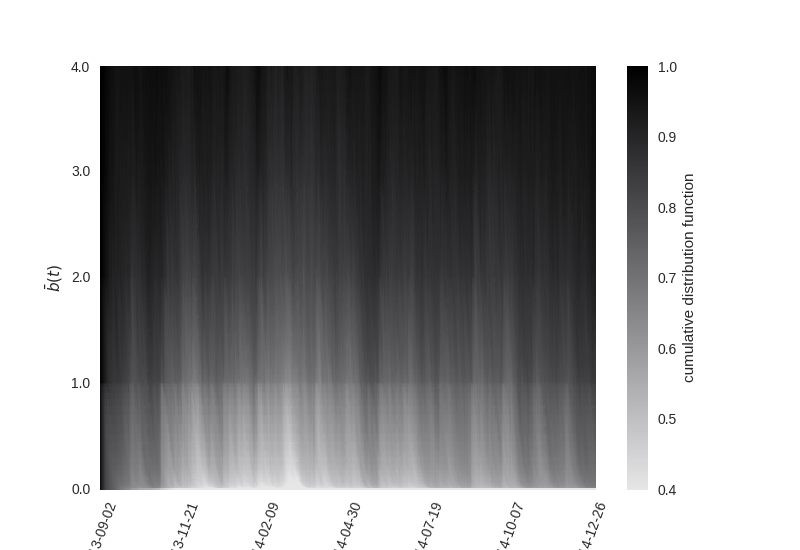

In [70]:
# plot cdf as heatmap (fig.: 3.3)

fig, ax = plt.subplots(1,1)

num_ticks = 5
# the index of the position of yticks
yticks = np.linspace(0, len(cdfx)-1, num_ticks, dtype=np.int)
# the content of labels of these yticks
yticklabels = [round(cdfx[idx]) for idx in yticks]

cmap = sns.cubehelix_palette(60, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

ax = sns.heatmap(df2, cmap=cmap, xticklabels=80, yticklabels=yticklabels, vmin=0.4, vmax=1, cbar_kws={'label': 'cumulative distribution function'})#, norm=LogNorm(vmin=0.1, vmax=1))#, , cbar_kws={"ticks": cbar_ticks})
#ax.hlines([300], *ax.get_xlim(), linestyles="dashed")
ax.set_yticks(yticks)
ax.invert_yaxis()
plt.xticks(rotation=70)
plt.yticks(rotation=0)
plt.ylabel(r"$\bar b(t)$")
#ax.set_yscale('log')

#sns.heatmap(cdf.cdf, annot=False)
fig.savefig("test.png" , dpi=600, bbox_inches='tight')

<IPython.core.display.Javascript object>


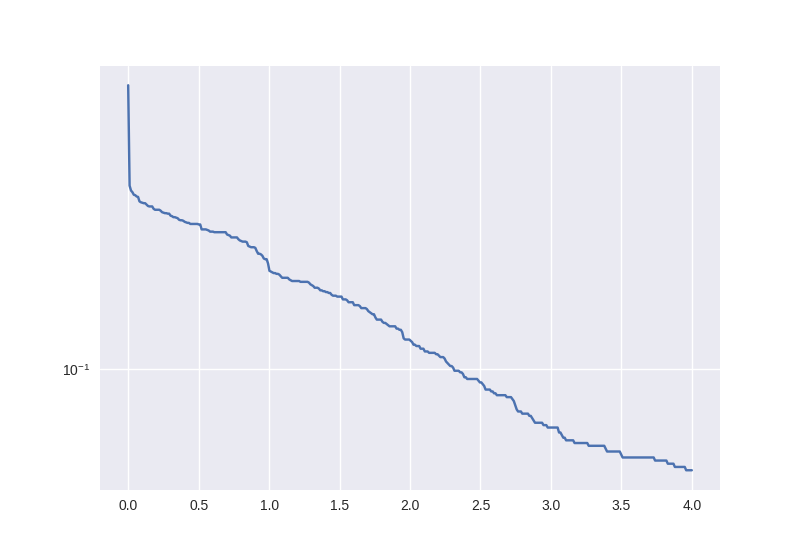

In [53]:
# plot cdf for singe timestep

fig, ax = plt.subplots(1,1)
ax.plot(cdf.loc["2014-02-09"].reset_index().x, 1-cdf.loc["2014-11-30","cdf"].values)
ax.set_yscale('log')